In [54]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [97]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv('3df_uniti.csv', parse_dates=['date'], date_parser=dateparse)

In [98]:
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [99]:
df.drop(["Unnamed: 0"],axis =1,inplace=True)

In [100]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


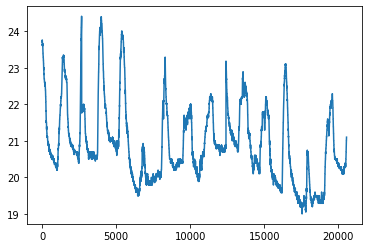

In [109]:
ts_tem = df['Temperature']
plt.plot(ts_tem)
plt.show()

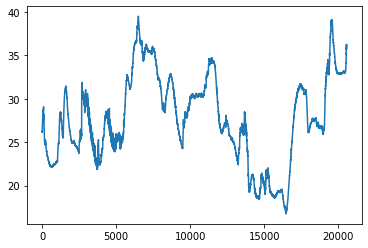

In [102]:
ts_hum = df['Humidity']
plt.plot(ts_hum)
plt.show()

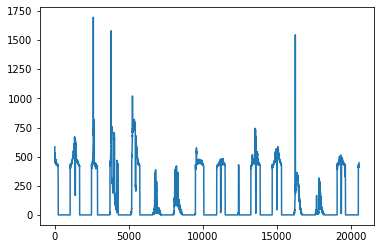

In [103]:
ts_lig = df['Light']
plt.plot(ts_lig)
plt.show()

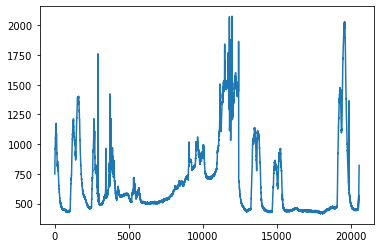

In [104]:
ts_co2 = df['CO2']
plt.plot(ts_co2)
plt.show()

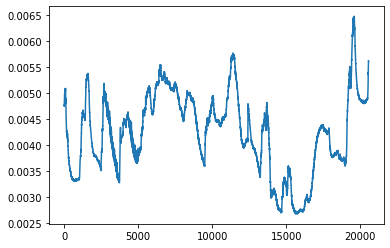

In [105]:
ts_hum_rat = df['HumidityRatio']
plt.plot(ts_hum_rat)
plt.show()

# GENERATE RANDOM TIME SERIES.. BOH..

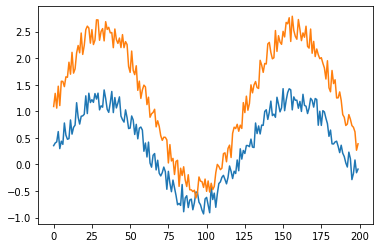

In [106]:
ts1 = pd.Series([np.sin(float(x)/20.)+np.random.rand()/2. for x in range(200)])
ts2 = pd.Series([1.5*np.sin(float(x)/20.)+np.random.rand()/2.+0.8 for x in range(200)])
plt.plot(ts1)
plt.plot(ts2)
plt.show()

# Transformations


### Transformation I: Offset Translation

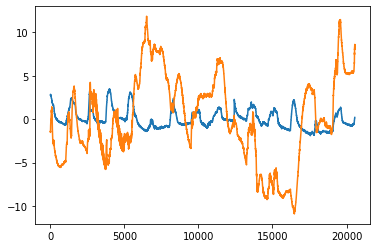

In [114]:
plt.plot(ts_tem - ts_tem.mean())
plt.plot(ts_hum - ts_hum.mean())
plt.show()

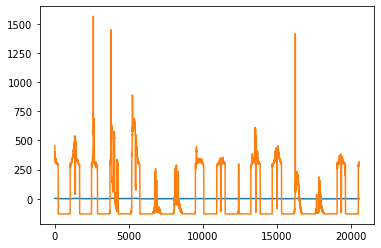

In [115]:
plt.plot(ts_tem - ts_tem.mean())
plt.plot(ts_lig - ts_lig.mean())
plt.show()

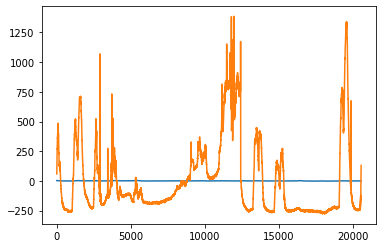

In [116]:
plt.plot(ts_tem - ts_tem.mean())
plt.plot(ts_co2 - ts_co2.mean())
plt.show()

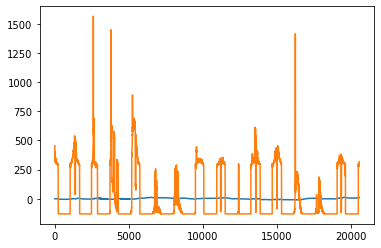

In [117]:
plt.plot(ts_hum - ts_hum.mean())
plt.plot(ts_lig - ts_lig.mean())
plt.show()

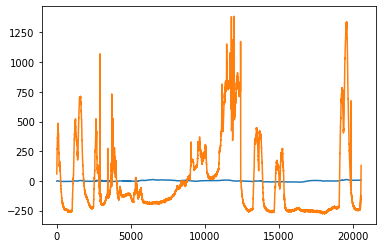

In [118]:
plt.plot(ts_hum - ts_hum.mean())
plt.plot(ts_co2 - ts_co2.mean())
plt.show()

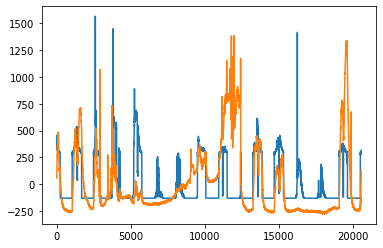

In [119]:
plt.plot(ts_lig - ts_lig.mean())
plt.plot(ts_co2 - ts_co2.mean())
plt.show()

### Transformation II: Amplitude Scaling


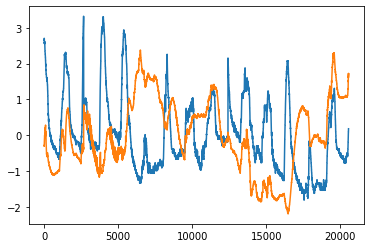

In [163]:
plt.plot((ts_tem - ts_tem.mean())/ts_tem.std())
plt.plot((ts_hum - ts_hum.mean())/ts_hum.std())
plt.show()

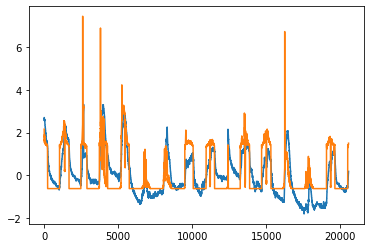

In [164]:
plt.plot((ts_tem - ts_tem.mean())/ts_tem.std())
plt.plot((ts_lig - ts_lig.mean())/ts_lig.std())
plt.show()

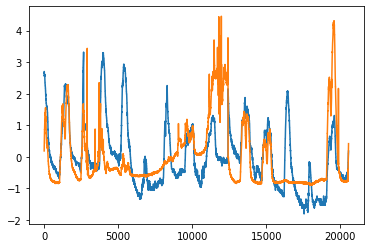

In [165]:
plt.plot((ts_tem - ts_tem.mean())/ts_tem.std())
plt.plot((ts_co2 - ts_co2.mean())/ts_co2.std())
plt.show()

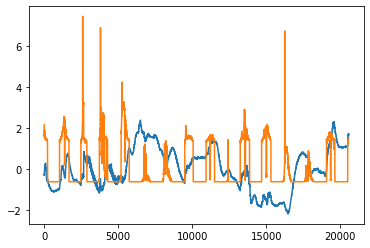

In [166]:
plt.plot((ts_hum - ts_hum.mean())/ts_hum.std())
plt.plot((ts_lig - ts_lig.mean())/ts_lig.std())
plt.show()

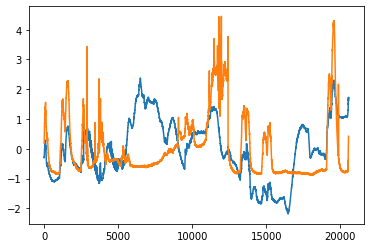

In [167]:
plt.plot((ts_hum - ts_hum.mean())/ts_hum.std())
plt.plot((ts_co2 - ts_co2.mean())/ts_co2.std())
plt.show()

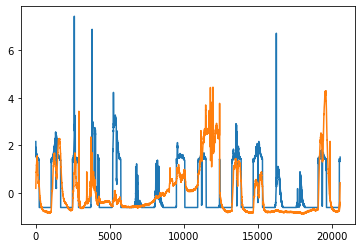

In [168]:
plt.plot((ts_lig - ts_lig.mean())/ts_lig.std())
plt.plot((ts_co2 - ts_co2.mean())/ts_co2.std())
plt.show()

In [129]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

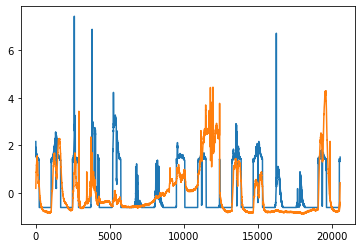

In [132]:
# cazzo fa? 

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts_lig).flatten()
ts2_scaled = scaler.fit_transform(ts_co2).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Transformation IV: Noise (smoothing)

### W fondamentale

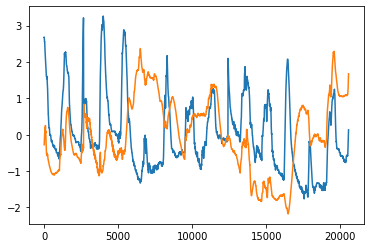

In [169]:
w = 10
plt.plot(((ts_tem - ts_tem.mean())/ts_tem.std()).rolling(window=w).mean())
plt.plot(((ts_hum - ts_hum.mean())/ts_hum.std()).rolling(window=w).mean())
plt.show()

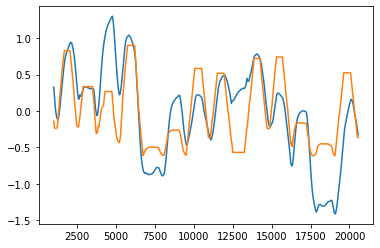

In [172]:
w = 1000
plt.plot(((ts_tem - ts_tem.mean())/ts_tem.std()).rolling(window=w).mean())
plt.plot(((ts_lig - ts_lig.mean())/ts_lig.std()).rolling(window=w).mean())
plt.show()

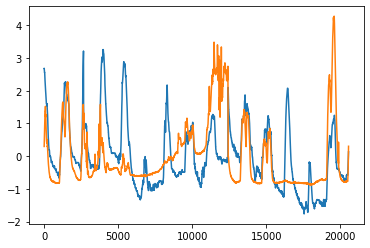

In [173]:
w = 10
plt.plot(((ts_tem - ts_tem.mean())/ts_tem.std()).rolling(window=w).mean())
plt.plot(((ts_co2 - ts_co2.mean())/ts_co2.std()).rolling(window=w).mean())
plt.show()

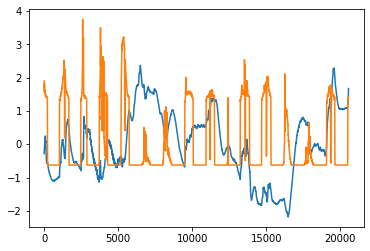

In [176]:
w = 10
plt.plot(((ts_hum - ts_hum.mean())/ts_hum.std()).rolling(window=w).mean())
plt.plot(((ts_lig - ts_lig.mean())/ts_lig.std()).rolling(window=w).mean())
plt.show()

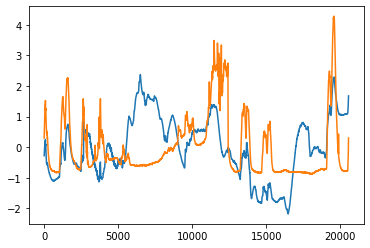

In [178]:
w = 10
plt.plot(((ts_hum - ts_hum.mean())/ts_hum.std()).rolling(window=w).mean())
plt.plot(((ts_co2 - ts_co2.mean())/ts_co2.std()).rolling(window=w).mean())
plt.show()

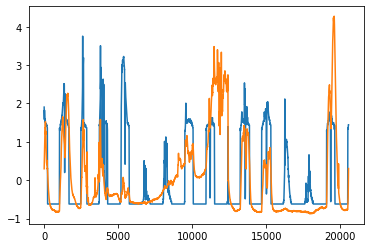

In [179]:
w = 10
plt.plot(((ts_lig - ts_lig.mean())/ts_lig.std()).rolling(window=w).mean())
plt.plot(((ts_co2 - ts_co2.mean())/ts_co2.std()).rolling(window=w).mean())
plt.show()

### Transformation III: Trend removal

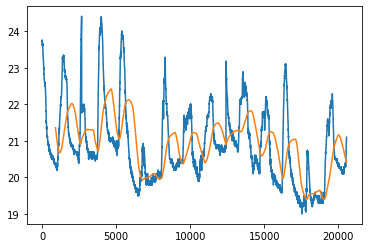

In [193]:
plt.plot(ts_tem)
plt.plot(ts_tem.rolling(window=900).mean())
plt.show()

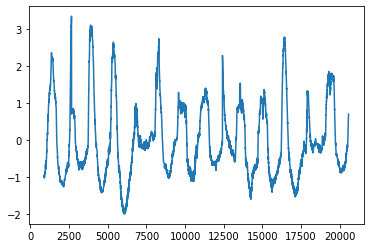

In [192]:
ts_shift_tem = ts_tem - ts_tem.rolling(window=900).mean()
plt.plot(ts_shift_tem)
plt.show()

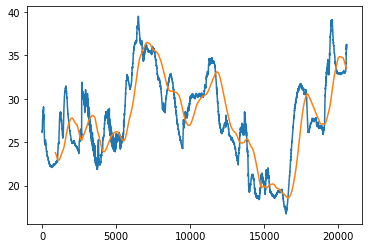

In [191]:
plt.plot(ts_hum)
plt.plot(ts_hum.rolling(window=900).mean())
plt.show()

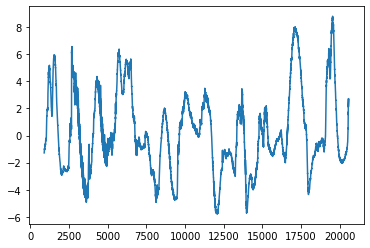

In [194]:
ts_shift_hum = ts_hum - ts_hum.rolling(window=900).mean()
plt.plot(ts_shift_hum)
plt.show()

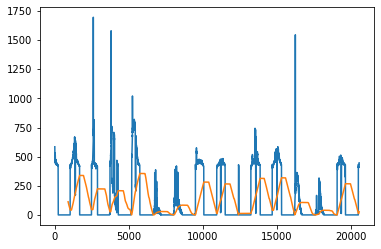

In [195]:
plt.plot(ts_lig)
plt.plot(ts_lig.rolling(window=900).mean())
plt.show()

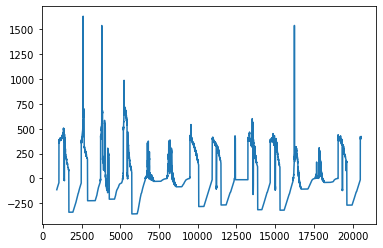

In [196]:
ts_shift_lig = ts_lig - ts_lig.rolling(window=900).mean()
plt.plot(ts_shift_lig)
plt.show()

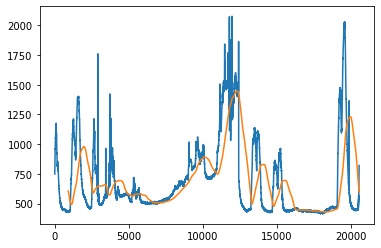

In [197]:
plt.plot(ts_co2)
plt.plot(ts_co2.rolling(window=900).mean())
plt.show()

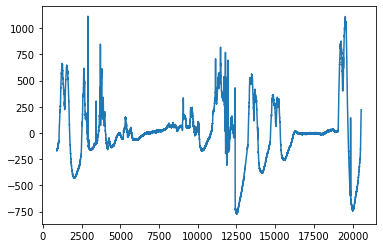

In [198]:
ts_shift_co2 = ts_co2 - ts_co2.rolling(window=900).mean()
plt.plot(ts_shift_co2)
plt.show()

# Eucldidean distance

In [199]:
from scipy.spatial.distance import euclidean

In [202]:
dist = euclidean(ts_tem, ts_hum)
dist

1226.3065019361811

In [201]:
#questo lo salto in tutti non capisco perchè dovrei farlo
dist = euclidean(ts1[:10], ts2[:10])
dist

2.9850394826529865

In [203]:
dist = euclidean(ts_tem, ts_lig)
dist

33944.24173367709

In [204]:
dist = euclidean(ts_tem, ts_co2)
dist

105852.11935828417

In [206]:
dist = euclidean(ts_hum, ts_lig)
dist

33625.94528018091

In [207]:
dist = euclidean(ts_hum, ts_co2)
dist

104915.2192069411

In [208]:
dist = euclidean(ts_lig, ts_co2)
dist

90209.61091857031

# Manhattan distance

In [209]:
from scipy.spatial.distance import cityblock

In [211]:
dist = cityblock(ts_tem, ts_hum)
dist

147133.63151190476

In [212]:
#ANCHE QUESTO LO SALTO PER TUTTI

dist = cityblock(ts1[:10], ts2[:10])
dist

9.229442061558935

In [213]:
dist = cityblock(ts_tem, ts_lig)
dist

2790471.1468214286

In [214]:
dist = cityblock(ts_tem, ts_co2)
dist

13767943.635297619

In [215]:
dist = cityblock(ts_hum, ts_lig)
dist

2849956.569452381

In [216]:
dist = cityblock(ts_hum, ts_co2)
dist

13629169.545785714

In [217]:
dist = cityblock(ts_lig, ts_co2)
dist

11577267.007142857

# Dynamic Time Warping

In [218]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [220]:
dist = dtw(ts_tem, ts_hum)
dist

905.8799967355628

In [221]:
#SALTO ANCHE QUESTI
dist = dtw(ts1[:10], ts2[:10])
dist

2.873427054699646

In [222]:
dist = dtw(ts_tem, ts_lig)
dist

33819.854327216555

In [223]:
dist = dtw(ts_tem, ts_co2)
dist

105852.11935828366

In [224]:
dist = dtw(ts_hum, ts_lig)
dist

32946.5777184495

In [225]:
dist = dtw(ts_hum, ts_co2)
dist

104915.21920694092

In [226]:
dist = dtw(ts_lig, ts_co2)
dist

54341.27058336583

In [227]:
#non credo ci interessi
path, dist = dtw_path(ts_tem[:10], ts_hum[:10])

In [228]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [229]:
from scipy.spatial.distance import cdist

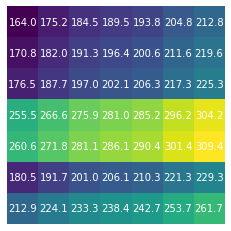

In [267]:
mat1 = cdist(ts_tem.values[:10].reshape(-1,1), ts_hum.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

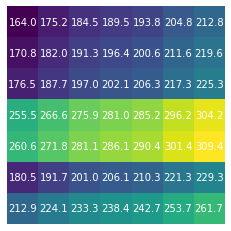

In [268]:
#con 10 si leggeva male
mat2 = cdist(ts_tem.values[:7].reshape(-1,1), ts_lig.values[:7].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

plt.show()

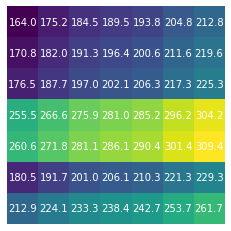

In [269]:
#con 10 si leggeva male
mat3 = cdist(ts_tem.values[:7].reshape(-1,1), ts_co2.values[:7].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

plt.show()

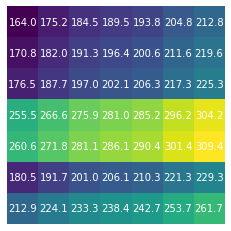

In [270]:
mat4 = cdist(ts_hum.values[:7].reshape(-1,1), ts_lig.values[:7].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

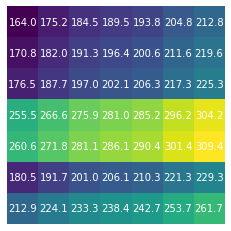

In [271]:
mat5 = cdist(ts_hum.values[:7].reshape(-1,1), ts_co2.values[:7].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

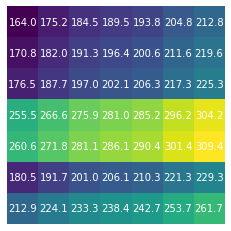

In [272]:
mat6 = cdist(ts_lig.values[:7].reshape(-1,1), ts_co2.values[:7].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

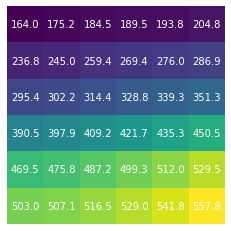

In [273]:
acc1 = subsequence_cost_matrix(ts_tem.values[:10].reshape(-1,1), ts_hum.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

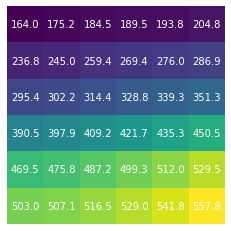

In [274]:
acc2 = subsequence_cost_matrix(ts_tem.values[:7].reshape(-1,1), ts_lig.values[:7].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

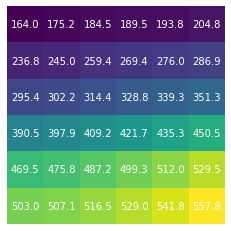

In [275]:
acc3 = subsequence_cost_matrix(ts_tem.values[:6].reshape(-1,1), ts_co2.values[:6].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

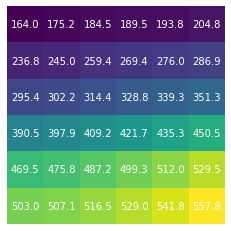

In [276]:
acc4 = subsequence_cost_matrix(ts_hum.values[:6].reshape(-1,1), ts_lig.values[:6].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

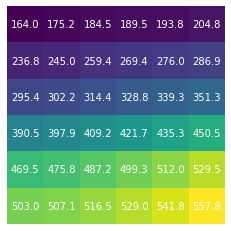

In [277]:
acc5 = subsequence_cost_matrix(ts_hum.values[:6].reshape(-1,1), ts_co2.values[:6].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

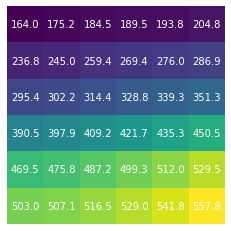

In [278]:
acc6 = subsequence_cost_matrix(ts_lig.values[:6].reshape(-1,1), ts_co2.values[:6].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

In [288]:
# QUALCOSA NON VA

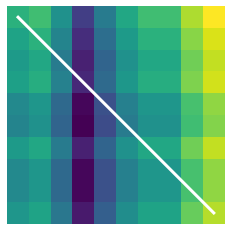

In [282]:
plt.imshow(mat1)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

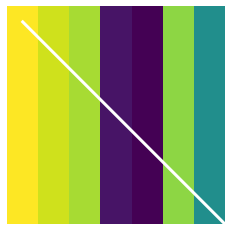

In [283]:
plt.imshow(mat2)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

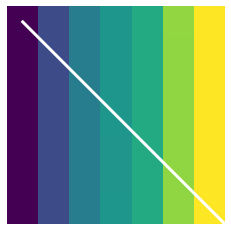

In [284]:
plt.imshow(mat3)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

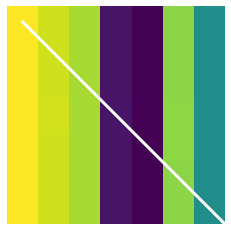

In [285]:
plt.imshow(mat4)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

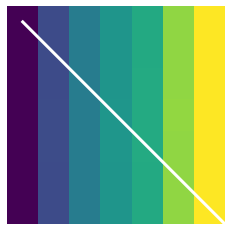

In [286]:
plt.imshow(mat5)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

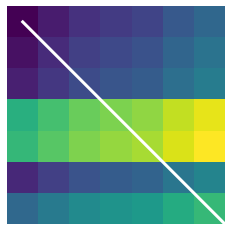

In [287]:
plt.imshow(mat6)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [289]:
path, dist = dtw_path(ts_tem[:10], ts_hum[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

8.015804279671501

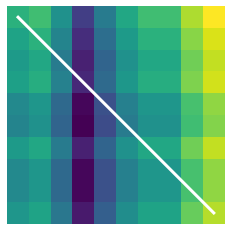

In [290]:
plt.imshow(mat1)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [291]:
path, dist = dtw_path(ts_tem[:10], ts_lig[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

1611.6518684435491

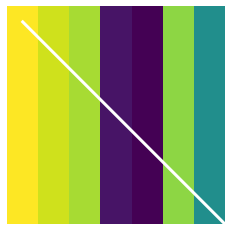

In [292]:
plt.imshow(mat2)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [293]:
path, dist = dtw_path(ts_tem[:10], ts_co2[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

2401.7938545391503

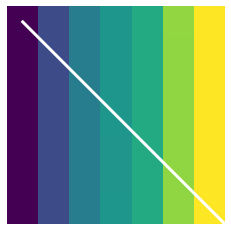

In [294]:
plt.imshow(mat3)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [295]:
path, dist = dtw_path(ts_hum[:10], ts_lig[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

1603.6607450483411

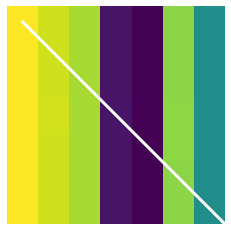

In [296]:
plt.imshow(mat4)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [297]:
path, dist = dtw_path(ts_hum[:10], ts_co2[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

2393.7817452001436

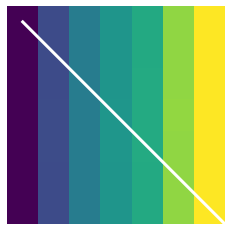

In [298]:
plt.imshow(mat5)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [299]:
path, dist = dtw_path(ts_lig[:10], ts_co2[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

811.7788423510981

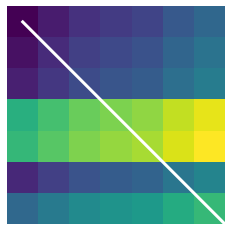

In [300]:
plt.imshow(mat6)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

### DTW2

In [305]:
from pyts.metrics import dtw as dtw2

ModuleNotFoundError: No module named 'pyts'